## K Means Clustering Project

__Data__: data on a number of universities. Note: data actually contains the labels, but will not be considered when performing the KMeans clustering algorithm (proof-of-principle project). Later the labels will be introduced to compare how the algorithm did. 
- Private A factor with levels No and Yes indicating private or public university
- Apps Number of applications received
- Accept Number of applications accepted
- Enroll Number of new students enrolled
- Top10perc Pct. new students from top 10% of H.S. class
- Top25perc Pct. new students from top 25% of H.S. class
- F.Undergrad Number of fulltime undergraduates
- P.Undergrad Number of parttime undergraduates
- Outstate Out-of-state tuition
- Room.Board Room and board costs
- Books Estimated book costs
- Personal Estimated personal spending
- PhD Pct. of faculty with Ph.D.’s
- Terminal Pct. of faculty with terminal degree
- S.F.Ratio Student/faculty ratio
- perc.alumni Pct. alumni who donate
- Expend Instructional expenditure per student
- Grad.Rate Graduation rate

__Goal__: use KMeans clustering to cluster universities into one of two groups, Private or Public.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
%matplotlib inline

In [2]:
# Load data into dataframe

df = pd.read_csv('College_Data')

### Exploratory Data Analysis

In [3]:
df.head() 

# Note that the Private feature gives the desired labels. This feature will not be considered later when performing
# the KMeans clustering (proof-of-principle)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [4]:
# Will perform some preliminary data cleaning on the columns names
df = df.rename({'Unnamed: 0': 'university'}, axis=1) # change name for university column
df.columns = map(str.lower, df.columns) # make all column names lower case
df.set_index('university', inplace=True) # make university column the index

In [5]:
df.head()

,private,apps,accept,enroll,top10perc,top25perc,f.undergrad,p.undergrad,outstate,room.board,books,personal,phd,terminal,s.f.ratio,perc.alumni,expend,grad.rate
university,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [6]:
df.describe() # outlier detected in the grad.rate column (max is 118% which cannot be true)

,apps,accept,enroll,top10perc,top25perc,f.undergrad,p.undergrad,outstate,room.board,books,personal,phd,terminal,s.f.ratio,perc.alumni,expend,grad.rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [7]:
# Identify the observation with outlier in the graduation rate column

df[df['grad.rate']==df['grad.rate'].max()]

,private,apps,accept,enroll,top10perc,top25perc,f.undergrad,p.undergrad,outstate,room.board,books,personal,phd,terminal,s.f.ratio,perc.alumni,expend,grad.rate
university,,,,,,,,,,,,,,,,,,
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


In [8]:
# Drop this record from the data frame

df.drop(['Cazenovia College'], inplace=True)

In [9]:
df.describe() # no more outlier

,apps,accept,enroll,top10perc,top25perc,f.undergrad,p.undergrad,outstate,room.board,books,personal,phd,terminal,s.f.ratio,perc.alumni,expend,grad.rate
count,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000,776.000000
mean,3000.548969,2016.981959,780.298969,27.582474,55.823454,3703.373711,856.385309,10442.030928,4356.904639,549.315722,1341.725515,72.725515,79.744845,14.089433,22.747423,9662.701031,65.395619
std,3872.578376,2452.168020,929.731001,17.639133,19.803448,4852.585693,1523.112196,4025.431964,1097.266697,165.201826,676.833991,16.236897,14.684883,3.960895,12.399401,5224.659733,17.084743
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.000000
25%,776.000000,603.250000,242.000000,15.000000,41.000000,991.000000,95.000000,7305.000000,3595.750000,469.500000,865.000000,62.000000,71.000000,11.500000,13.000000,6749.250000,53.000000
50%,1557.500000,1109.500000,434.000000,23.000000,54.000000,1707.500000,354.000000,9990.000000,4197.500000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8392.500000,65.000000
75%,3603.000000,2407.500000,902.250000,35.000000,69.000000,4030.250000,967.250000,12931.250000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10838.500000,78.000000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,100.000000


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 776 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   private      776 non-null    object 
 1   apps         776 non-null    int64  
 2   accept       776 non-null    int64  
 3   enroll       776 non-null    int64  
 4   top10perc    776 non-null    int64  
 5   top25perc    776 non-null    int64  
 6   f.undergrad  776 non-null    int64  
 7   p.undergrad  776 non-null    int64  
 8   outstate     776 non-null    int64  
 9   room.board   776 non-null    int64  
 10  books        776 non-null    int64  
 11  personal     776 non-null    int64  
 12  phd          776 non-null    int64  
 13  terminal     776 non-null    int64  
 14  s.f.ratio    776 non-null    float64
 15  perc.alumni  776 non-null    int64  
 16  expend       776 non-null    int64  
 17  grad.rate    776 non-null    int64  
dtypes: 


Pearson's correlation coefficient: 0.43
p-value: 0.00



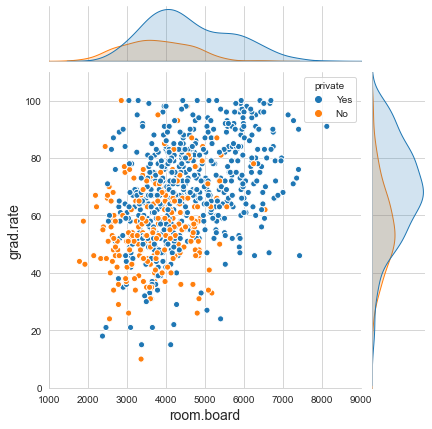

In [11]:
# joinplot for grad.rate versus room.board with Pearson correlation coefficient and p-value
# There appears to be a positive linear relationship between graduation rate and room and boarding costs

sns.set_style("whitegrid")
r, p = stats.pearsonr(df['grad.rate'], df['room.board'])
print("""
Pearson's correlation coefficient: {:.2f}
p-value: {:.2f}
""".format(r, p))

g = sns.jointplot(x='room.board', y='grad.rate', data=df, hue='private',
             marker=".", s=150, marginal_kws={ "alpha":.2})
g.set_axis_labels('room.board', 'grad.rate', fontsize=14)
g.ax_marg_x.set_xlim(1000, 9000)
g.ax_marg_y.set_ylim(0, 110);


Pearson's correlation coefficient: -0.22
p-value: 0.00



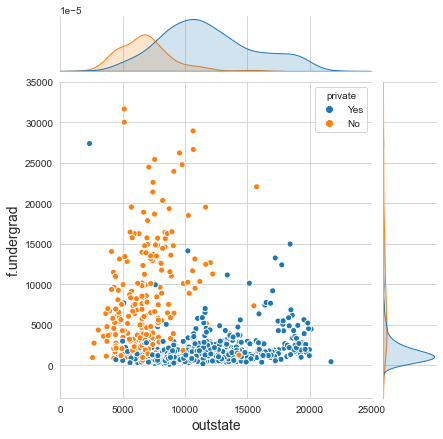

In [12]:
# joinplot for outstate versus f.undergrad with Pearson correlation coefficient and p-value
# Clearly public universities have far more fulltime undergraduates, with Texa A&M having the highest around 33,000,
# with lower out of state tuition fees. It appears private universities are more selective and have higher 
# out of state tuition fees. 

sns.set_style("whitegrid")
r, p = stats.pearsonr(df['f.undergrad'], df['outstate'])
print("""
Pearson's correlation coefficient: {:.2f}
p-value: {:.2f}
""".format(r, p))

g = sns.jointplot(x='outstate', y='f.undergrad', data=df, hue='private',
             marker=".", s=150, marginal_kws={ "alpha":.2})
g.set_axis_labels('outstate', 'f.undergrad', fontsize=14)
g.ax_marg_x.set_xlim(0, 25000)
g.ax_marg_y.set_ylim(-4000, 35000);

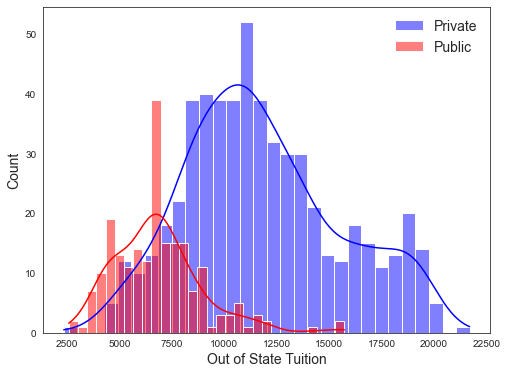

In [13]:
# Count of the universities versus out of state tuition with respect to private/public

sns.set_style("white")
plt.figure(figsize=(8,6))
ax = sns.histplot(data=df[df['private']=='Yes'], x='outstate', color='b', alpha=0.5, label='Private', bins=30, kde=True)
sns.histplot(data=df[df['private']=='No'], x='outstate', color='r', alpha=0.5, label='Public', bins=30, kde=True)
ax.set_xlabel('Out of State Tuition',fontsize=14)
ax.set_ylabel('Count',fontsize=14)
plt.legend(frameon=False, fontsize=14);

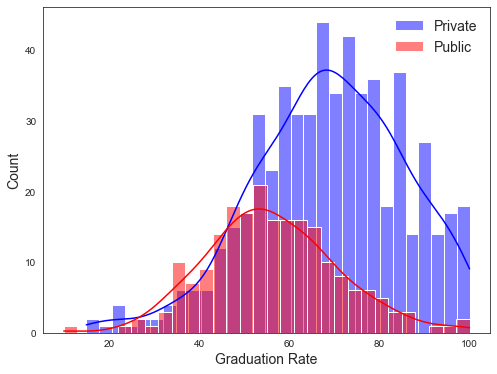

In [14]:
# Count of the universities versus graduation rate with respect to private/public

sns.set_style("white")
plt.figure(figsize=(8,6))
ax = sns.histplot(data=df[df['private']=='Yes'], x='grad.rate', color='b', alpha=0.5, label='Private', bins=30, kde=True)
sns.histplot(data=df[df['private']=='No'], x='grad.rate', color='r', alpha=0.5, label='Public', bins=30, kde= True)
ax.set_xlabel('Graduation Rate',fontsize=14)
ax.set_ylabel('Count',fontsize=14)
plt.legend(frameon=False, fontsize=14);

### K Means Clustering Model

In [15]:
from sklearn.cluster import KMeans

In [16]:
kmeans = KMeans(n_clusters=2) # instance of KMean cluster model with 2 clusters

# Docs: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
# https://scikit-learn.org/stable/modules/clustering.html#k-means

In [26]:
# Now we drop the private column which consists of the labels, and fit the data

kmeans.fit(df.drop('private', axis=1)) 

KMeans(n_clusters=2)

In [27]:
# Docs: "Coordinates of cluster centers."
# Source: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

kmeans.cluster_centers_

array([[1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01, 3.14814815e-01],
       [1.81019012e+03, 1.28395359e+03, 4.90991018e+02, 2.53338323e+01,
        5.34985030e+01, 2.19031287e+03, 5.96332335e+02, 1.03972231e+04,
        4.31057335e+03, 5.41895210e+02, 1.28150449e+03, 7.05149701e+01,
        7.78712575e+01, 1.40994012e+01, 2.31796407e+01, 8.93389521e+03,
        6.50404192e+01, 7.93413174e-01]])

In [28]:
kmeans.labels_ # labels of each point

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

### Evaluation

Note: This is a proof-of-principle demonstration, where we now compare the results of the KMeans model with the known labels in the data.

In [29]:
# Add a column where private=1 and public=0

df['cluster'] = df.private.apply(lambda row: 1 if row=='Yes' else 0)

In [30]:
df.head()

,private,apps,accept,enroll,top10perc,top25perc,f.undergrad,p.undergrad,outstate,room.board,books,personal,phd,terminal,s.f.ratio,perc.alumni,expend,grad.rate,cluster
university,,,,,,,,,,,,,,,,,,,
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,1
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,1
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,1
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1


In [31]:
from sklearn.metrics import classification_report,confusion_matrix

In [32]:
print("Confusion Matrix:")
print()
print(confusion_matrix(df.cluster,kmeans.labels_))

Confusion Matrix:

[[ 74 138]
 [ 34 530]]


In [33]:
print("Classification Report:")
print()
print(classification_report(df.cluster,kmeans.labels_))

Classification Report:

              precision    recall  f1-score   support

           0       0.69      0.35      0.46       212
           1       0.79      0.94      0.86       564

    accuracy                           0.78       776
   macro avg       0.74      0.64      0.66       776
weighted avg       0.76      0.78      0.75       776



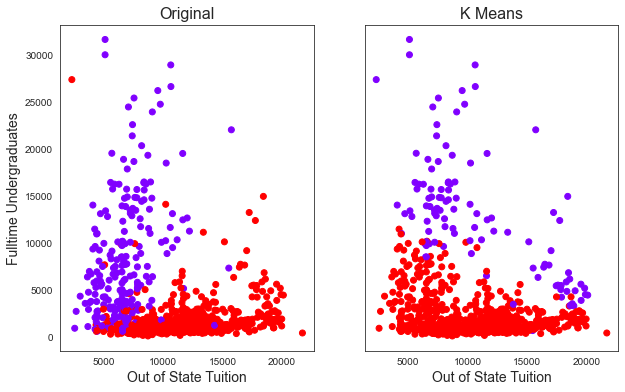

In [34]:
# Quick visualization of the clustering with the actual labeled data and the results from the KMeans.
# Here we compare f.undergrad with outstate as shown above in the joinplot.

f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, figsize=(10,6))
ax1.set_title("Original", fontsize=16)
ax1.scatter(df.iloc[:,8],df.iloc[:,6],c=df.cluster,cmap='rainbow')
ax1.set_xlabel('Out of State Tuition', fontsize=14)
ax1.set_ylabel('Fulltime Undergraduates', fontsize=14)
ax2.set_title('K Means', fontsize=16)
ax2.scatter(df.iloc[:,8],df.iloc[:,6],c=kmeans.labels_,cmap='rainbow')
ax2.set_xlabel('Out of State Tuition', fontsize=14);

__Conclusion__: KMeans does a fairly good job classifying the universities. 